# Analyse du rapport du bien-être sur terre

In [3]:
#Importation de packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Pour les tests statistiques
from scipy.stats import spearmanr
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



## Exploration des données

In [5]:
#importer le jeu de données du 2005 à 2020. Et 2021

df = pd.read_csv("Fichier_de_base.csv")
df_21 =pd.read_csv("Fichier_2021.csv")

### Etape 1/ comprendre les données

In [6]:
df.head(10) #Affichage des 10 première lignes du jeu de données

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [7]:
df.info()#affichage des informations sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [8]:
df.describe() # Résumé statistique des variables numériques

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [9]:
df.isna().sum() #affichage des valeurs manquantes pour chaque variable

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

### Identifier les valeurs uniques dans les colonnes catégorielles :

In [10]:
df["year"].unique () #voir sur combien d'années l'étude a été menée

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005], dtype=int64)

In [11]:
df.sort_values(by = "year", ascending = True ,inplace = True ) # On ordonne les années

### Récupération de la classification des pays par région du dataset 2021.

In [12]:
# Définir l'option pour afficher toutes les lignes
pd.set_option("display.max_rows", None)

# Afficher les colonnes "Country name" et "Regional indicator"
print(df_21[["Country name", "Regional indicator"]])

                  Country name                  Regional indicator
0                      Finland                      Western Europe
1                      Denmark                      Western Europe
2                  Switzerland                      Western Europe
3                      Iceland                      Western Europe
4                  Netherlands                      Western Europe
5                       Norway                      Western Europe
6                       Sweden                      Western Europe
7                   Luxembourg                      Western Europe
8                  New Zealand               North America and ANZ
9                      Austria                      Western Europe
10                   Australia               North America and ANZ
11                      Israel        Middle East and North Africa
12                     Germany                      Western Europe
13                      Canada               North America and

### Adjonction de la variable région pour notre dataset

In [13]:
def get_regional_indicator(country_name):
    # Dictionnaire de correspondance des pays avec leur région
    country_to_region = {
        "Denmark": "Western Europe",
        "France": "Western Europe",
        "Mexico": "Latin America and Caribbean",
        "Germany": "Western Europe",
        "Poland": "Central and Eastern Europe",
        "Spain": "Western Europe",
        "Greece": "Western Europe",
        "Brazil": "Latin America and Caribbean",
        "Sweden": "Western Europe",
        "Egypt": "Middle East and North Africa",
        "Saudi Arabia": "Middle East and North Africa",
        "Lebanon": "Middle East and North Africa",
        "Netherlands": "Western Europe",
        "Australia": "Australia and New Zealand",
        "United Kingdom": "Western Europe",
        "Canada": "North America",
        "Iran": "Middle East and North Africa",
        "Pakistan": "South Asia",
        "Hungary": "Central and Eastern Europe",
        "Czech Republic": "Central and Eastern Europe",
        "Belgium": "Western Europe",
        "Turkey": "Middle East and North Africa",
        "Jordan": "Middle East and North Africa",
        "Venezuela": "Latin America and Caribbean",
        "Italy": "Western Europe",
        "Japan": "East Asia",
        "Romania": "Central and Eastern Europe",
        "Portugal": "Western Europe",
        "Singapore": "Southeast Asia",
        "Sierra Leone": "Sub-Saharan Africa",
        "Rwanda": "Sub-Saharan Africa",
        "Chile": "Latin America and Caribbean",
        "Senegal": "Sub-Saharan Africa",
        "Russia": "Commonwealth of Independent States",
        "Colombia": "Latin America and Caribbean",
        "Chad": "Sub-Saharan Africa",
        "China": "East Asia",
        "South Korea": "East Asia",
        "Slovenia": "Central and Eastern Europe",
        "Uganda": "Sub-Saharan Africa",
        "Belarus": "Commonwealth of Independent States",
        "Trinidad and Tobago": "Latin America and Caribbean",
        "Togo": "Sub-Saharan Africa",
        "Benin": "Sub-Saharan Africa",
        "Thailand": "Southeast Asia",
        "Tanzania": "Sub-Saharan Africa",
        "Bolivia": "Latin America and Caribbean",
        "Tajikistan": "Commonwealth of Independent States",
        "Taiwan Province of China": "East Asia",
        "Switzerland": "Western Europe",
        "Botswana": "Sub-Saharan Africa",
        "Sri Lanka": "South Asia",
        "Burkina Faso": "Sub-Saharan Africa",
        "Cambodia": "Southeast Asia",
        "South Africa": "Sub-Saharan Africa",
        "Cameroon": "Sub-Saharan Africa",
        "Slovakia": "Central and Eastern Europe",
        "Philippines": "Southeast Asia",
        "Costa Rica": "Latin America and Caribbean",
        "Cuba": "Latin America and Caribbean",
        "Malawi": "Sub-Saharan Africa",
        "Madagascar": "Sub-Saharan Africa",
        "Guatemala": "Latin America and Caribbean",
        "Lithuania": "Central and Eastern Europe",
        "Haiti": "Latin America and Caribbean",
        "Latvia": "Central and Eastern Europe",
        "Honduras": "Latin America and Caribbean",
        "Malaysia": "Southeast Asia",
        "Laos": "Southeast Asia",
        "Kyrgyzstan": "Commonwealth of Independent States",
        "Kuwait": "Middle East and North Africa",
        "Kenya": "Sub-Saharan Africa",
        "India": "South Asia",
        "Kazakhstan": "Commonwealth of Independent States",
        "Indonesia": "Southeast Asia",
        "Jamaica": "Latin America and Caribbean",
        "Ireland": "Western Europe",
        "Hong Kong S.A.R. of China": "East Asia",
        "Ghana": "Sub-Saharan Africa",
        "Mali": "Sub-Saharan Africa",
        "Georgia": "Commonwealth of Independent States",
        "Cyprus": "Middle East and North Africa",
        "Paraguay": "Latin America and Caribbean",
        "Panama": "Latin America and Caribbean",
        "Palestinian Territories": "Middle East and North Africa",
        "Bangladesh": "South Asia",
        "Dominican Republic": "Latin America and Caribbean",
        "Norway": "Western Europe",
        "Ecuador": "Latin America and Caribbean",
        "Nigeria": "Sub-Saharan Africa",
        "Niger": "Sub-Saharan Africa",
        "Nicaragua": "Latin America and Caribbean",
        "El Salvador": "Latin America and Caribbean",
        "New Zealand": "Australia and New Zealand",
        "Estonia": "Central and Eastern Europe",
        "Nepal": "South Asia",
        "Mozambique": "Sub-Saharan Africa",
        "Finland": "Western Europe",
        "Moldova": "Commonwealth of Independent States",
        "Peru": "Latin America and Caribbean",
        "Ukraine": "Commonwealth of Independent States",
        "Israel": "Middle East and North Africa",
        "Azerbaijan": "Commonwealth of Independent States",
        "Vietnam": "Southeast Asia",
        "Uruguay": "Latin America and Caribbean",
        "Zimbabwe": "Sub-Saharan Africa",
        "Armenia": "Commonwealth of Independent States",
        "Austria": "Western Europe",
        "Argentina": "Latin America and Caribbean",
        "United States": "North America",
        "Zambia": "Sub-Saharan Africa",
        "United Arab Emirates": "Middle East and North Africa",
        "Uzbekistan": "Commonwealth of Independent States",
        "Liberia": "Sub-Saharan Africa",
        "Bosnia and Herzegovina": "Central and Eastern Europe",
        "Montenegro": "Central and Eastern Europe",
        "Croatia": "Central and Eastern Europe",
        "Central African Republic": "Sub-Saharan Africa",
        "Mongolia": "East Asia",
        "Bulgaria": "Central and Eastern Europe",
        "Albania": "Central and Eastern Europe",
        "Mauritania": "Sub-Saharan Africa",
        "Yemen": "Middle East and North Africa",
        "Kosovo": "Central and Eastern Europe",
        "Serbia": "Central and Eastern Europe",
        "North Macedonia": "Central and Eastern Europe",
        "Belize": "Latin America and Caribbean",
        "Guyana": "Latin America and Caribbean",
        "Namibia": "Sub-Saharan Africa",
        "Afghanistan": "South Asia",
        "Djibouti": "Sub-Saharan Africa",
        "Congo (Brazzaville)": "Sub-Saharan Africa",
        "Iceland": "Western Europe",
        "Iraq": "Middle East and North Africa",
        "Syria": "Middle East and North Africa",
        "Burundi": "Sub-Saharan Africa",
        "Congo (Kinshasa)": "Sub-Saharan Africa",
        "Qatar": "Middle East and North Africa",
        "Ivory Coast": "Sub-Saharan Africa",
        "Tunisia": "Middle East and North Africa",
        "Turkmenistan": "Commonwealth of Independent States",
        "Comoros": "Sub-Saharan Africa",
        "Bahrain": "Middle East and North Africa",
        "Somaliland region": "Sub-Saharan Africa",
        "Luxembourg": "Western Europe",
        "Malta": "Western Europe",
        "Sudan": "Sub-Saharan Africa",
        "Algeria": "Middle East and North Africa",
        "Morocco": "Middle East and North Africa",
        "Swaziland": "Sub-Saharan Africa",
        "Guinea": "Sub-Saharan Africa",
        "Lesotho": "Sub-Saharan Africa",
        "Oman": "Middle East and North Africa",
        "Angola": "Sub-Saharan Africa",
        "Gabon": "Sub-Saharan Africa",
        "Mauritius": "Sub-Saharan Africa",
        "Myanmar": "Southeast Asia",
        "North Cyprus": "Western Europe",
        "Suriname": "Latin America and Caribbean",
        "Libya": "Middle East and North Africa",
        "Ethiopia": "Sub-Saharan Africa",
        "Bhutan": "South Asia",
        "Somalia": "Sub-Saharan Africa",
        "South Sudan": "Sub-Saharan Africa",
        "Gambia": "Sub-Saharan Africa",
        "Maldives": "South Asia"
    }

    # Recherche le pays dans le dictionnaire
    if country_name in country_to_region:
        return country_to_region[country_name]
    else:
        return "Unknown"

# Ajouter une colonne "Regional indicator" dans le DataFrame
df["Regional indicator"] = df["Country name"].apply(get_regional_indicator)


In [14]:
print("Les valeurs manquantes pour la variable 'Regional indicator' =  ", df["Regional indicator"].isna().sum())

Les valeurs manquantes pour la variable 'Regional indicator' =   0


### Adjonction la variable température

In [15]:
df2 = pd.read_csv('climate_change_indicators.csv', sep=";")

df_a_renamed = df2.rename(columns={'NMGB': 'Country name', 'Year': 'year'})
df = pd.merge(df, df_a_renamed[['Country name', 'year', 'Temperature']], on=['Country name', 'year'], how='left')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Temperature
0,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NaN,0.237,0.860,0.154,Western Europe,1.282
1,France,2005,7.093,10.642,0.940,71.3,0.895,NaN,0.688,0.769,0.225,Western Europe,1.020
2,Mexico,2005,6.581,9.788,0.903,66.2,0.814,NaN,0.764,0.820,0.219,Latin America and Caribbean,0.806
3,Germany,2005,6.620,10.689,0.963,70.2,0.847,NaN,0.781,0.776,0.197,Western Europe,1.025
4,Poland,2005,5.587,9.849,0.922,66.3,0.782,NaN,0.983,0.715,0.282,Central and Eastern Europe,0.881


In [16]:
print ("Les valeur manquantes pour la variable 'Temperature'  =", df["Temperature"].isna().sum())

Les valeur manquantes pour la variable 'Temperature'  = 110


In [17]:
ratio_val_manquantes = df.isnull().sum()/len (df)*100
ratio_val_manquantes_arrondies = round(ratio_val_manquantes, 2)
print(ratio_val_manquantes_arrondies)

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  1.85
Social support                      0.67
Healthy life expectancy at birth    2.82
Freedom to make life choices        1.64
Generosity                          4.57
Perceptions of corruption           5.64
Positive affect                     1.13
Negative affect                     0.82
Regional indicator                  0.00
Temperature                         5.64
dtype: float64


## Etape 2/ Exploration et analyse des données avec DataViz

A- Un histogramme nous permettra de voir la distribution du score de bonheur parmi les différents pays.

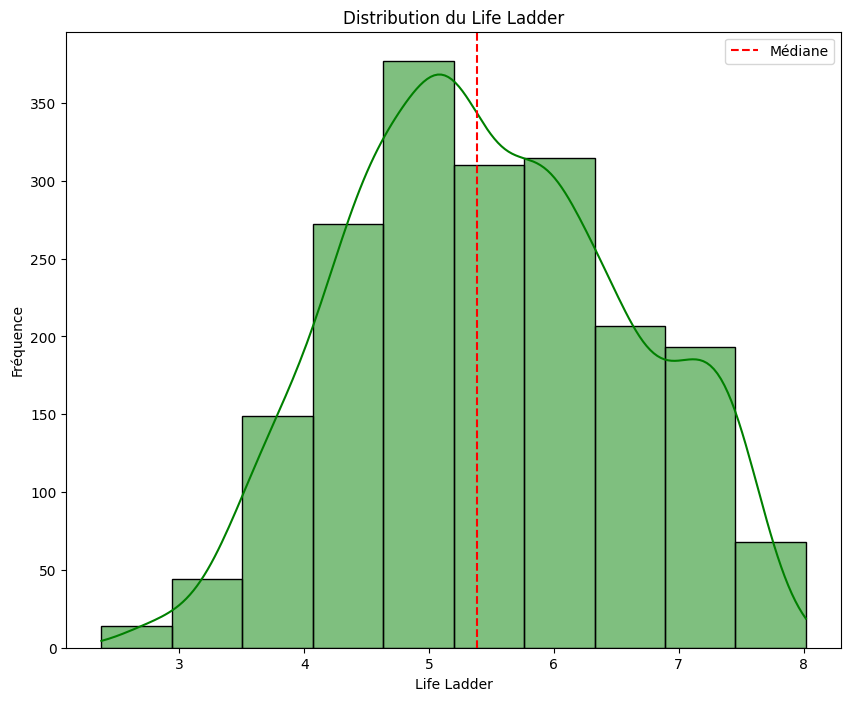

In [18]:
# Créer le displot avec seaborn
plt.figure(figsize=(10, 8))
sns.histplot(df["Life Ladder"], kde=True, bins=10, color="g", edgecolor="black")
plt.title("Distribution du Life Ladder")
plt.xlabel("Life Ladder")
plt.ylabel("Fréquence")

# Calculer la médiane
median_value = df["Life Ladder"].median()

# Ajouter la ligne de médiane
plt.axvline(x=median_value, color="red", linestyle="--", label="Médiane")

# Afficher le graphique avec la légende
plt.legend()
plt.show()

In [19]:
#Commentaire
# - Le graphe montre la fréquence des différents scores de bonheur sur une échelle de 0 à 8, où 0 représente
#le moins heureux et 8 le plus heureux.

# - La forme du graphe est asymétrique, avec une queue plus longue vers la gauche.
#Cela indique qu’il y a plus de gens qui ont un score de bonheur inférieur à la moyenne que supérieur à la moyenne.

B- Boxplot du score du bonheur par années

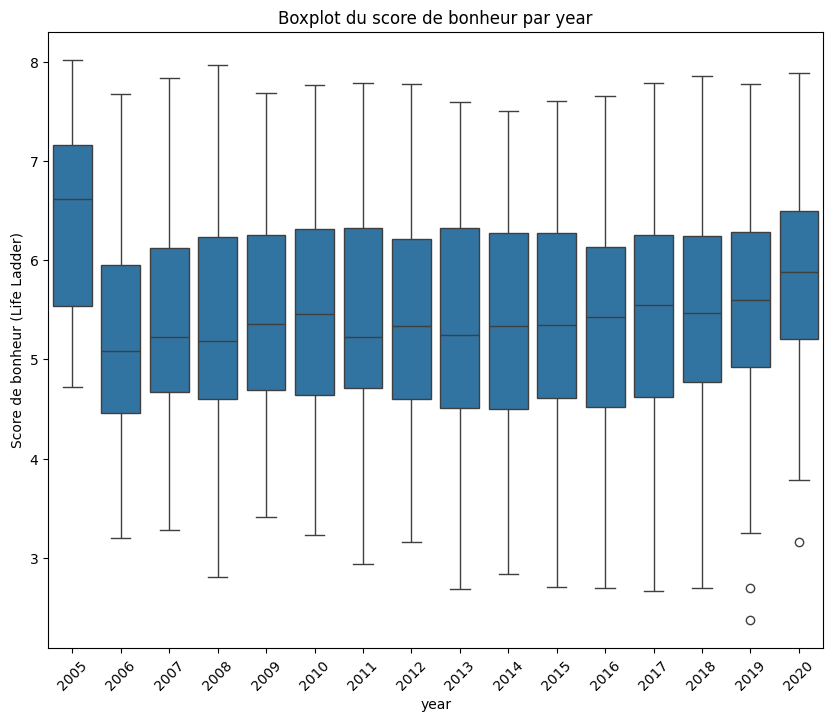

In [20]:
# Sélectionner les variables catégorielles
variables_catégorielles = [ "year"]

# Tracer des boxplots pour chaque variable catégorielle
for variable in variables_catégorielles:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=variable, y="Life Ladder", data=df)
    plt.title(f"Boxplot du score de bonheur par {variable}")
    plt.xlabel(variable)
    plt.ylabel("Score de bonheur (Life Ladder)")
    plt.xticks(rotation=45)
    plt.show()

In [22]:
# Interprétation :
#1) Les scores de bonheur semblent avoir augmenté au fil des années, avec une légère variation d’une année à l’autre.
# 2) La médiane (ligne au milieu de chaque boîte) semble également augmenter progressivement.
# 3) Les valeurs aberrantes en 2020 pourraient être dues à des circonstances exceptionnelles (comme la pandémie de COVID-19).

C- Analyse du boxenplot du facture du score du bonheur par région

C:\Users\yacin\AppData\Local\Temp\ipykernel_29904\1150225768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Life Ladder", y="Regional indicator", data = df, palette = "viridis")


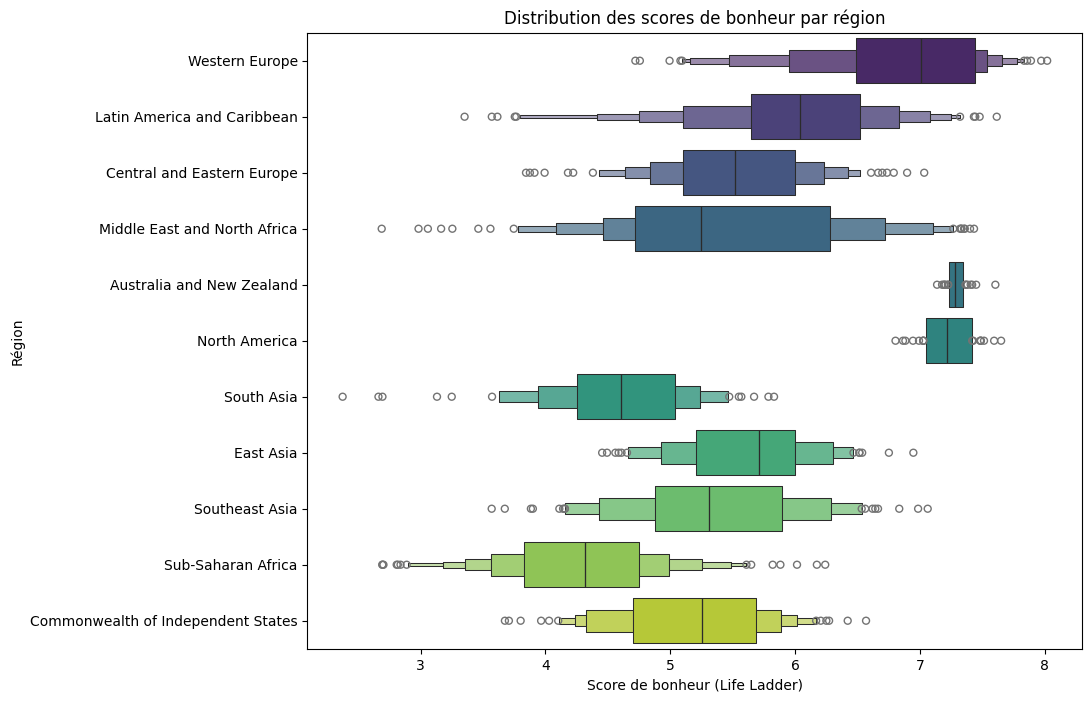

In [23]:
# Créer le boxenplot avec seaborn
plt.figure(figsize=(10, 8))
sns.boxenplot(x="Life Ladder", y="Regional indicator", data = df, palette = "viridis")
plt.title("Distribution des scores de bonheur par région")
plt.xlabel("Score de bonheur (Life Ladder)")
plt.ylabel("Région")

plt.show();


In [26]:
# - Pour l’Australie et la Nouvelle-Zélande, on peut dire :
#Cette région a le score de bonheur moyen le plus élevé, avec environ 5,2. Son boite à moustache est étroit et symétrique,
#ce qui signifie que les scores de bonheur sont peu dispersés et proches de la moyenne.
#Il n’y a pas de valeurs aberrantes, ce qui signifie que tous les pays de cette région ont un niveau de bonheur similaire.

# - Pour l’Afrique subsaharienne, on peut dire :
# Cette région a le score de bonheur moyen le plus bas, avec environ 4,1. Son boite à moustache est large et asymétrique,
#ce qui signifie que les scores de bonheur sont très dispersés et plus faibles que la moyenne.
#Il y a plusieurs valeurs aberrantes, ce qui signifie que certains pays de cette région ont un niveau de bonheur très différent
#des autres.

# - Pour l’Europe occidentale, on peut dire :
# Cette région a un score de bonheur moyen élevé, avec environ 5,1.
#Son boite à moustache est étroit et légèrement asymétrique,
#ce qui signifie que les scores de bonheur sont peu dispersés et légèrement supérieurs à la moyenne.
#Il y a quelques valeurs aberrantes, ce qui signifie que certains pays de cette région ont un niveau de bonheur plus bas ou plus haut que les autres.

D- Affichage de la matrice de correlation des variables numériques

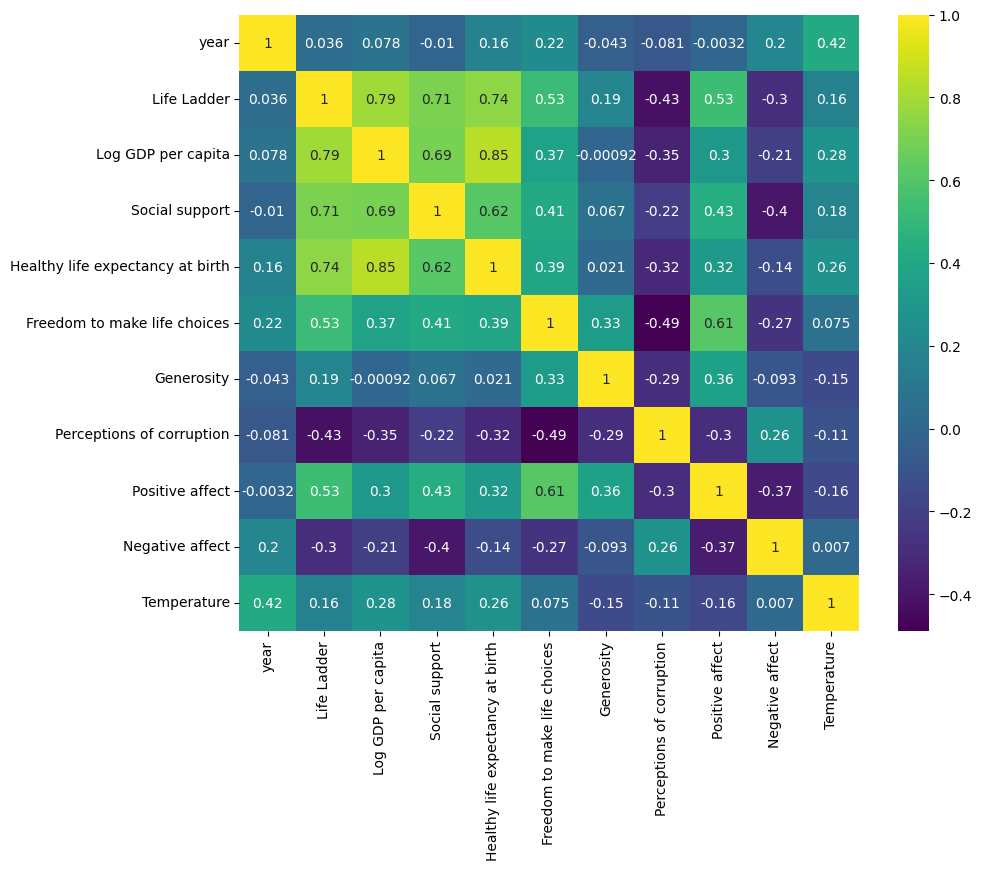

In [28]:
#Affichage de la matrice de corrélation par heatmap
df_base_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = df_base_numeric.corr()

# Création de la heatmap avec seaborn
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix, annot=True,cmap='viridis')
plt.show()

In [29]:
# - Le coefficient entre “Life Ladder” et “Log GDP per capita” est de 0,79,
# ce qui signifie qu’il y a une corrélation positive forte entre ces deux variables.
# Cela implique que plus le produit intérieur brut par habitant est élevé, plus le score de bonheur est élevé, et vice versa.

# - Le coefficient entre “Freedom to make life choices” et “Perceptions of corruption” est de -0,44,
#ce qui signifie qu’il y a une corrélation négative modérée entre ces deux variables.
#Cela implique que plus la liberté de choix est élevée, plus la perception de la corruption est faible, et vice versa.

# - Le coefficient entre “Generosity” et “Log GDP per capita” est de 0,000092,
#ce qui signifie qu’il n’y a pratiquement pas de corrélation entre ces deux variables.
#Cela implique que le niveau de générosité n’est pas lié au niveau de richesse, et qu’il peut varier indépendamment.

In [30]:
import plotly.express as px

# Tracer le nuage de points interactif avec Plotly Express
fig = px.scatter(df,
                 x="Log GDP per capita",
                 y="Life Ladder",
                 animation_frame="year",
                 animation_group="Country name",

                 color="Social support",
                 hover_name="Country name",
                 size_max=200,
                 template="plotly_white")

# Mettre à jour le titre du graphique
fig.update_layout(title="comparaison de Life Ladder and Log GDP per capita par country name pour chaque années")

# Afficher le graphique
fig.show()

In [31]:
fig = px.choropleth(df.sort_values("year"),
                   locations="Country name",
                   color="Life Ladder",
                   locationmode="country names",
                   animation_frame="year")
fig.update_layout(title="Life Ladder Comparison par Countries")
fig.show()